# Matrix Factorization

In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

plt.rcParams['figure.figsize'] = [8, 6]

# Data - MovieLens

[The MovieLens](https://grouplens.org/datasets/movielens/) contains movie rating dataset for 671 across 9066 movies. This total to about 100k ratings.

In [2]:
# Load the data
ratings_df = pd.read_csv('D:\\Rafal\\CUNY\\643\\hw\hw3\\data\\ratings.csv')
movies_df = pd.read_csv('D:\\Rafal\\CUNY\\643\\hw\hw3\\data\\movies.csv')

# Pivot to generate a user-item matrix
df_original = ratings_df.pivot(index = 'userId', columns ='movieId', values = 'rating')
df_original = ratings_df.pivot(index = 'userId', columns ='movieId', values = 'rating')

df = df_original.fillna(0)

df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Raw Average 

The raw average helps us normalize the values as well as reverse the singlular value decomposition transformation.

In [3]:
# Calculate the raw average using the original data (with nans instead of zeros to get a more accurate mean)
avg_movie = df_original.mean()
avg_user = df_original.mean(axis=1)
raw_avg_all = (avg_user.mean() + avg_movie.mean()) / 2

# Bias

We calculate user and movie bias that can be applied after SVD transformations and calculating the error rates.

In [4]:
#  calculate the bias for each user and each item.
bias_movie = avg_movie - raw_avg_all
bias_user = avg_user - raw_avg_all

# Singular Value Decomposition (SVD)

- U = Unitary matrix having left singular vectors as columns. 
- Sigma = The singular values.
- fit_transform = U * Sigma
- vt = Unitary matrix having right singular vectors as rows.

In [18]:
# Convert the dataframe into a matrix and normalize by substracting the user average
# this technique is much faster than a similar operation on the dataframe type
mx = df.as_matrix()
user_ratings_mean = np.mean(mx, axis = 1).reshape(-1, 1)
mx_norm = mx - user_ratings_mean

# Perform a TruncatedSVD using 3 components on the normalized matrix
svd = TruncatedSVD(n_components=3)
fit_transform = svd.fit_transform(mx_norm)  
vt = svd.components_


In [16]:
# Compute the predicted values and add user mean as well as user bias
user_predicted_with_avg = np.dot(fit_transform, vt) + avg_user.values.reshape(-1,1)
user_predicted_with_bias = np.dot(fit_transform, vt) + bias_user.values.reshape(-1,1)

# Convert into a dataframe
preds_df_with_avg = pd.DataFrame(user_predicted_with_avg, columns = df.columns, index=df.index)
preds_with_bias = pd.DataFrame(user_predicted_with_bias, columns = df.columns, index=df.index)

# clip > 5
preds_df_with_avg[preds_df_with_avg > 5.00] = 5.00
preds_df_with_avg[preds_df_with_avg < 0.00] = 0.00

preds_with_bias[preds_with_bias > 5.00] = 5.00
preds_with_bias[preds_with_bias < 0.00] = 0.00

preds_df_with_avg.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,2.601535,2.567406,2.564192,2.549679,2.564697,2.588699,2.577792,2.548695,2.551554,2.570350,...,2.546208,2.544283,2.543193,2.544122,2.544082,2.543284,2.542688,2.544033,2.544101,2.548213
2,4.219038,3.752783,3.590350,3.469505,3.608485,3.855000,3.638999,3.460409,3.479684,3.790996,...,3.444879,3.436194,3.438511,3.436386,3.437091,3.435226,3.440278,3.434986,3.434982,3.454781
3,4.321611,3.851606,3.625129,3.544298,3.649355,3.854778,3.601580,3.537424,3.546383,3.889064,...,3.531538,3.532106,3.543551,3.533562,3.534936,3.537843,3.549919,3.532052,3.531557,3.532261
4,5.000000,5.000000,4.658960,4.303704,4.705971,5.000000,4.831184,4.277374,4.336086,5.000000,...,4.229375,4.200524,4.202180,4.200396,4.201998,4.194353,4.204674,4.196578,4.196824,4.261557
5,5.000000,4.374783,4.011324,3.870975,4.050332,4.396771,3.984613,3.859238,3.875788,4.436815,...,3.847880,3.847254,3.864625,3.849448,3.851605,3.855602,3.874371,3.846971,3.846235,3.850627


# Root Mean Square Error (RMSE)
 
An interesting observation for RMSE - when number of components increases, the RMSE for user average insreases but decreases for user bias. 
 

In [17]:
# Calculate the RMSE for the baseline predictors
print("RMSE (user avg): ", round(math.sqrt(((user_predicted_with_avg - df_original)  ** 2).mean().mean()), 2))
print("RMSE (user bias): ", round(math.sqrt(((user_predicted_with_bias - df_original)  ** 2).mean().mean()), 2))

RMSE (user avg):  1.01
RMSE (user bias):  3.2


# Sum of explained variance ratio for component values 1-100

This can help us with choosing the right number of components

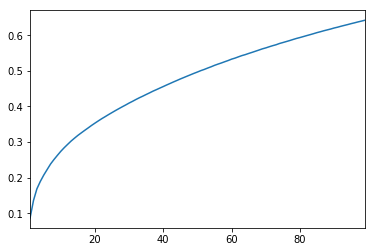

In [8]:
# Get the sum of explained variance ratio for component values 1-100
variance_ratio = {}

for i in range(1,100):
    svd = TruncatedSVD(n_components=i)
    svd.fit_transform(mx_norm)  
    variance_ratio[i] = svd.explained_variance_ratio_.sum()

    
ratio_df = pd.Series(variance_ratio)
ratio_df.plot()  

# Predictions

In [9]:
def recommend(predictions_df, userID, original_ratings_df, n=5):   

    
    # A list of movies already rated by a user
    all_rated = original_ratings_df.iloc[userID][original_ratings_df.iloc[userID].notnull()]
    highest_rated = all_rated.sort_values(ascending=False)[:n]
    highest_rated_title = movies_df[movies_df.movieId.isin(highest_rated.index)].title
    highest_rated_gen = movies_df[movies_df.movieId.isin(highest_rated.index)].genres
  
    rated = pd.DataFrame({'movieId': highest_rated.index,
                          'title':highest_rated_title.values,
                          'genre':highest_rated_gen.values,
                          'rated': highest_rated.values})
    
    rated = rated[['movieId', 'title', 'rated', 'genre']]
    
    # A list of predictions
    predicted_not_rated = predictions_df.iloc[userID].drop(all_rated.index,'index')
    highest_predicted_not_rated = predicted_not_rated.sort_values(ascending=False).head(n)
    highest_predicted_not_rated_title = movies_df[movies_df.movieId.isin(highest_predicted_not_rated.index)].title
    highest_predicted_not_rated_gen = movies_df[movies_df.movieId.isin(highest_predicted_not_rated.index)].genres
  
    predictions = pd.DataFrame({'movieId': highest_predicted_not_rated.index,
                                'title': highest_predicted_not_rated_title.values,
                                'genre': highest_predicted_not_rated_gen.values,
                                'rated': np.round(highest_predicted_not_rated.values, 2)})

    predictions = predictions[['movieId', 'title', 'rated', 'genre']]
    
    
    return rated, predictions
    

rated, predictions = recommend(preds_df_with_avg, 12, df_original, 10)

In [10]:
rated

,movieId,title,rated,genre
0,1,Toy Story (1995),5.0,Adventure|Animation|Children|Comedy|Fantasy
1,356,Forrest Gump (1994),5.0,Comedy|Drama|Romance|War
2,7502,"Jungle Book, The (1994)",4.5,Adventure|Children|Romance
3,88125,Pearl Harbor (2001),4.5,Action|Drama|Romance|War
4,4310,Donnie Darko (2001),4.5,Drama|Mystery|Sci-Fi|Thriller
5,362,"Lord of the Rings: The Fellowship of the Ring,...",4.5,Adventure|Fantasy
6,4878,Finding Nemo (2003),4.5,Adventure|Animation|Children|Comedy
7,4993,Band of Brothers (2001),4.5,Action|Drama|War
8,6377,"Dark Knight, The (2008)",4.5,Action|Crime|Drama|IMAX
9,58559,Harry Potter and the Deathly Hallows: Part 2 (...,4.5,Action|Adventure|Drama|Fantasy|Mystery|IMAX


In [11]:
predictions

,movieId,title,rated,genre
0,1270,"Silence of the Lambs, The (1991)",5.00,Crime|Horror|Thriller
1,8961,Back to the Future (1985),5.00,Adventure|Comedy|Sci-Fi
2,4995,Saving Private Ryan (1998),5.00,Action|Drama|War
3,2028,Fight Club (1999),5.00,Action|Crime|Drama|Thriller
4,593,"Beautiful Mind, A (2001)",5.00,Drama|Romance
5,5952,"Lord of the Rings: The Two Towers, The (2002)",5.00,Adventure|Fantasy
6,7153,Pirates of the Caribbean: The Curse of the Bla...,5.00,Action|Adventure|Comedy|Fantasy
7,2959,"Lord of the Rings: The Return of the King, The...",4.86,Action|Adventure|Drama|Fantasy
8,79132,"Incredibles, The (2004)",4.85,Action|Adventure|Animation|Children|Comedy
9,6539,Inception (2010),4.84,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX


# Summary

- Singular Value Decomposition provides a way to compress the volume of the data while retaining the insights
- The explained variance ratio can be used to determing the most optimal component value
- Data normalization using user average seems to be more accurate than normalization with user bias 
- RMSE value of 1 may be more impactful when comparing higher rated movies (4.5 vs 3.5) than low scoring movies (2.0 vs 1.0)


# References:


http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

https://beckernick.github.io/matrix-factorization-recommender/